In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, matthews_corrcoef

# Load the pre-trained model
IMG_SIZE = (224, 224)
TEST_PATH = r'Ahsan\Frame Ahsan'
MODEL_FILENAME = r'Model_TM_withoutbanket\model_VGG16_Thermal_Lightoff.h5'
WEIGHTS_FILENAME = r'Model_TM_withoutbanket\model_VGG16_weight_Thermal_Lightoff.h5'

model = load_model(MODEL_FILENAME)
model.load_weights(WEIGHTS_FILENAME)

# Define class names
class_names = ['Left Log', 'Prone Left', 'Prone Right', 'Right Log', 'Supine']

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Load and preprocess each image in TEST_PATH, then predict its class
for root, dirs, files in os.walk(TEST_PATH):
    for img_filename in files:
        img_path = os.path.join(root, img_filename)
        
        if os.path.isfile(img_path):
            true_class = os.path.basename(root)
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            predictions = model.predict(img_array)
            predicted_class = class_names[np.argmax(predictions)]
            y_true.append(true_class)
            y_pred.append(predicted_class)


1/1 [==============================] - 0s 10ms/step


Confusion Matrix:
[[   0 3979 5139   70  240]
 [   0 4052    1    0    1]
 [   0 9107  162    0    0]
 [   0 8776 1686   24    1]
 [   0 5326 4351    0 9121]]
Classification Report:


c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Left Log       0.00      0.00      0.00      9428
  Prone Left       0.13      1.00      0.23      4054
 Prone Right       0.01      0.02      0.02      9269
   Right Log       0.26      0.00      0.00     10487
      Supine       0.97      0.49      0.65     18798

    accuracy                           0.26     52036
   macro avg       0.27      0.30      0.18     52036
weighted avg       0.42      0.26      0.26     52036



c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


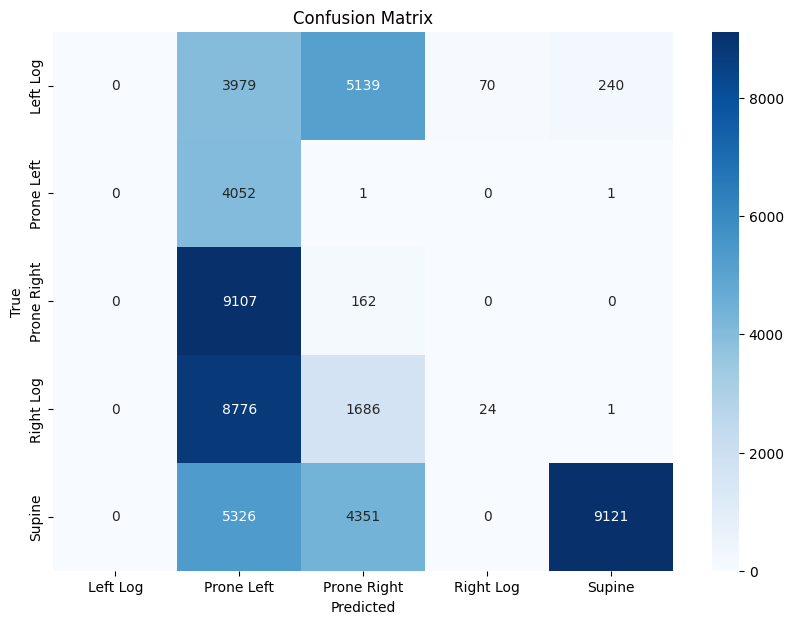

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [3]:

def compute_mcc_for_each_class(y_true, y_pred):
    classes = np.unique(y_true)
    mcc_scores = {}
    for cls in classes:
        temp_true = [1 if p == cls else 0 for p in y_true]
        temp_pred = [1 if p == cls else 0 for p in y_pred]
        mcc_scores[cls] = matthews_corrcoef(temp_true, temp_pred)
    return mcc_scores

def compute_accuracy_for_each_class(y_true, y_pred):
    classes = np.unique(y_true)
    accuracy_scores = {}
    for cls in classes:
        temp_true = [1 if p == cls else 0 for p in y_true]
        temp_pred = [1 if p == cls else 0 for p in y_pred]
        accuracy_scores[cls] = accuracy_score(temp_true, temp_pred)
    return accuracy_scores


In [4]:

# Compute and print MCC for each class
mcc_scores = compute_mcc_for_each_class(y_true, y_pred)
for label, mcc in mcc_scores.items():
    print(f"MCC for {label}: {mcc:.2f}")

# Compute and print accuracy for each class
accuracy_scores = compute_accuracy_for_each_class(y_true, y_pred)
total_accuracy = 0
for label, accuracy in accuracy_scores.items():
    print(f"Accuracy for {label}: {accuracy:.2f}")
    total_accuracy += accuracy

average_accuracy = total_accuracy / len(class_names)
print(f"\nAverage Accuracy: {average_accuracy:.2f}")


MCC for Left Log: 0.74
MCC for Prone Left: 0.90
MCC for Prone Right: 0.88
MCC for Right Log: 0.62
MCC for Supine: 0.90
Accuracy for Left Log: 0.89
Accuracy for Prone Left: 0.97
Accuracy for Prone Right: 0.96
Accuracy for Right Log: 0.89
Accuracy for Supine: 0.97

Average Accuracy: 0.93


In [5]:

# Compute and print sensitivity and specificity for each class
sensitivity = {}
specificity = {}
for i in range(len(class_names)):
    true_positive = cm[i, i]
    false_negative = sum(cm[i, :]) - true_positive
    false_positive = sum(cm[:, i]) - true_positive
    true_negative = sum(sum(cm)) - true_positive - false_negative - false_positive
    
    sensitivity[class_names[i]] = true_positive / (true_positive + false_negative)
    specificity[class_names[i]] = true_negative / (true_negative + false_positive)

average_sensitivity = sum(sensitivity.values()) / len(class_names)
average_specificity = sum(specificity.values()) / len(class_names)

for label in class_names:
    print(f"Sensitivity for {label}: {sensitivity[label]:.2f}")
    print(f"Specificity for {label}: {specificity[label]:.2f}")
    print("\n")

print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")


Sensitivity for Left Log: 0.98
Specificity for Left Log: 0.87


Sensitivity for Prone Left: 0.93
Specificity for Prone Left: 0.98


Sensitivity for Prone Right: 0.93
Specificity for Prone Right: 0.97


Sensitivity for Right Log: 0.45
Specificity for Right Log: 1.00


Sensitivity for Supine: 0.89
Specificity for Supine: 0.99


Average Sensitivity: 0.84
Average Specificity: 0.96


In [8]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

# Load the pre-trained model
IMG_SIZE = (224, 224)
MODEL_FILENAME = r'model_MobileNet_aug.h5'
WEIGHTS_FILENAME = r'model_MobileNet_weight.h5'

model = load_model(MODEL_FILENAME)
model.load_weights(WEIGHTS_FILENAME)

# Define class names
class_names = ['Left Log', 'Prone Left', 'Prone Right', 'Right Log', 'Supine']
# Correct file path if needed
video_filename = 'Test_sokea.MP4'
# Check if the file exists
if not os.path.exists(video_filename):
    print("Error: File not found!")
    exit()

cap = cv2.VideoCapture(video_filename)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Could not open video!")
    exit()

# Get the video frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_sokea.MP4', fourcc, 20.0, (frame_width, frame_height))

participant_name = "sokea"  # replace with actual participant name or fetching logic
# Get the width of the frame
frame_width = int(cap.get(3))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Resize the frame to the input size of the model
        resized_frame = cv2.resize(frame, IMG_SIZE)
        
        # Preprocess the frame
        img_array = image.img_to_array(resized_frame)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]
        
        # Annotate the frame with the predicted class
        fontScale = 2  # Adjust the size as needed
        thickness = 3  # Adjust the thickness as needed
        cv2.putText(frame, predicted_class, (50,50), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0,255,0), thickness, cv2.LINE_AA)
        
        # Annotate the frame with the participant's name
        # Annotate the frame with the participant's name
        participant_label = "Participant: " + participant_name
        fontScale = 1
        thickness = 2
        textSize = cv2.getTextSize(participant_label, cv2.FONT_HERSHEY_SIMPLEX, fontScale, thickness)[0]
        textX = frame_width - textSize[0] - 10  # 10 pixels padding from the right
        textY = 30  # Adjust y position as needed, e.g., 30 pixels from the top
        cv2.putText(frame, participant_label, (textX, textY), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0,255,255), thickness, cv2.LINE_AA)
        
        # Write the annotated frame to the new video file
        out.write(frame)
        
        # Display the resulting frame
        cv2.imshow('frame', frame)
        
        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 11ms/step
